___


# Plotly y Cufflinks

* Plotly es una librería que permite crear gráficos interactivos que se pueden usar en dashboards o sitios web (se pueden guardar como archivos html o imágenes estáticas). Ver: https://plot.ly/python/
* Cufflinks conecta a Plotly con Pandas. Ver: https://github.com/santosjorge/cufflinks

## Introducción

### Instalación

Es necesario instalar plotly y cufflinks para crear gráficos directamente desde los DataFrames de Pandas. 

Para ver las versiones más recientes vaya a:

[https://pypi.org/project/plotly/](https://pypi.org/project/plotly/)

[https://pypi.org/project/cufflinks/#history](https://pypi.org/project/cufflinks/#history)

In [0]:
#!pip install plotly==3.10.0
#!pip install cufflinks==0.16 OK
!pip install plotly
!pip install cufflinks

### Importar y configurar

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
import cufflinks as cf
print(cf.__version__)
# cf version 0.17.0 OK

0.17.3


In [0]:
cf.set_config_file(offline=True)

In [0]:
import plotly
plotly.__version__
# Plotly 4.4.1 OK

'4.4.1'

In [0]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [0]:
init_notebook_mode(connected=True)

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

### Datos de ejemplo

In [0]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

In [0]:
df.head()

,A,B,C,D
0,0.479563,-1.819593,0.110660,0.951684
1,-1.845634,-0.785698,0.347674,-1.163929
2,-0.398177,0.086521,2.747334,-0.230118
3,0.603397,0.944875,-0.780918,1.126223
4,-2.291153,-0.858020,1.259640,1.235323


In [0]:
df2 = pd.DataFrame({'Categoría':['A','B','C'],'Valor':[32,43,50]})

In [0]:
df2.head()

,Categoría,Valor
0,A,32
1,B,43
2,C,50


**Usando el método plot de Pandas, que usa matplotlib por debajo**

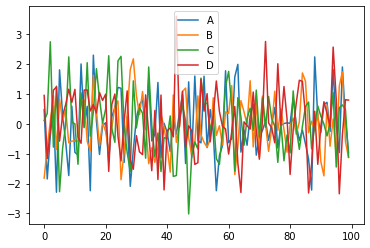

In [0]:
df.plot()

**Usando iplot() - Imagen interactiva de Plotly**

In [0]:
configure_plotly_browser_state()
df.iplot()

### Definir dimensiones de la Figura

In [0]:
configure_plotly_browser_state()
df[['B','D']].iplot(dimensions=(500,500), xTitle='Eje X')

## Usando Plotly+Cufflinks 

* scatter
* bar
* box
* 3D surface
* histogram
* spread
* bubble
* heatmap
* scatter_matrix


### Scatter

In [0]:
configure_plotly_browser_state()
df.iplot(kind='scatter',x='A',y='B',mode='markers') 

In [0]:
configure_plotly_browser_state()
df.iplot(kind='scatter',x='A',y='B',mode='markers',size=5)

In [0]:
df['C']

0     0.110660
1     0.347674
2     2.747334
3    -0.780918
4     1.259640
        ...   
95   -1.446532
96    0.540434
97    0.632540
98    0.476711
99   -1.111464
Name: C, Length: 100, dtype: float64

In [0]:
df_C_normalizado=(df['C']-df['C'].min())/(df['C'].max()-df['C'].min())
df_C_normalizado

0     0.542604
1     0.583720
2     1.000000
3     0.387938
4     0.741923
        ...   
95    0.272471
96    0.617159
97    0.633137
98    0.606105
99    0.330597
Name: C, Length: 100, dtype: float64

In [0]:
configure_plotly_browser_state()
df.iplot(kind='scatter',x='A',y='B',mode='markers+text',size=df_C_normalizado*40)

### Bar 

In [0]:
df2

,Categoría,Valor
0,A,32
1,B,43
2,C,50


In [0]:
configure_plotly_browser_state()
df2.iplot(kind='bar',x='Categoría',y='Valor')

In [0]:
df.head()

,A,B,C,D
0,0.479563,-1.819593,0.110660,0.951684
1,-1.845634,-0.785698,0.347674,-1.163929
2,-0.398177,0.086521,2.747334,-0.230118
3,0.603397,0.944875,-0.780918,1.126223
4,-2.291153,-0.858020,1.259640,1.235323


In [0]:
df.sum()

A   -5.124265
B   -4.547238
C    4.616041
D    7.104830
dtype: float64

In [0]:
configure_plotly_browser_state()
df.sum().iplot(kind='bar')
#df.count().iplot(kind='bar')
#df[['A','C']].mean().iplot(kind='bar')

In [1]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, x="time", y="total_bill", points="all")
fig.show()

### Boxplots

In [0]:
configure_plotly_browser_state()
df.iplot(kind='box', mode='markers+text')

### Superficie 3D

In [0]:
configure_plotly_browser_state()
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
df3.iplot(kind='surface',colorscale='rdylbu')

Ver más ejemplos: https://plot.ly/python/3d-surface-plots/

### Histogramas

In [0]:
configure_plotly_browser_state()
df['A'].iplot(kind='hist',bins=25)

In [0]:
configure_plotly_browser_state()
df.iplot(kind='hist')

### Bubble

El tamaño de los puntos depende de otra columna, en este caso, la columna C

In [0]:
configure_plotly_browser_state()
df.iplot(kind='bubble', x='A', y='B', size='D', colorscale='rdylbu')        

In [0]:
configure_plotly_browser_state()
df.iplot(kind='bubble', x='A', y='B', size='D', colorscale='rdylbu')   

In [0]:
configure_plotly_browser_state()
df.iplot(kind='bubble', x='A', y='B', size='D')   

In [0]:
df.iplot?

### Heatmap

Se requiere una matriz cuadrada.

In [0]:
df.corr()

,A,B,C,D
A,1.000000,0.072214,0.069443,0.017393
B,0.072214,1.000000,0.037819,-0.139590
C,0.069443,0.037819,1.000000,-0.147207
D,0.017393,-0.139590,-0.147207,1.000000


In [0]:
configure_plotly_browser_state()
df.corr().iplot(kind='heatmap',colorscale='spectral')

### scatter_matrix

Similar a pairplot() de Seaborn pero interactivo.

In [0]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [0]:
configure_plotly_browser_state()
df.scatter_matrix()

## Avanzado

Se puede exportar la figura Plotly en formato de texto (corresponde a un diccionario de Python):

In [0]:
configure_plotly_browser_state()
df.iplot(asFigure=True)

Se puede capturar y modificar esa información. 

En este caso se captura toda la info del df y se modifica el nombre de la primera columna

In [0]:
configure_plotly_browser_state()
datos = df.to_iplot(asFigure=True)
datos

[{'line': {'color': 'rgba(255, 153, 51, 1.0)',
   'dash': 'solid',
   'shape': 'linear',
   'width': 3},
  'mode': 'lines',
  'name': 'A',
  'type': 'scatter',
  'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
         85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
  'y': array([ 0.47956265, -1.84563388, -0.39817749,  0.60339749, -2.29115308,
          1.80686084,  0.30908971, -0.60350561, -1.73203334,  0.58855711,
         -0.95445688, -1.04687092,  2.00362215, -0.10629947,  0.58537856,
         -2.24085981,  2.29882404,  0.09930546, -1.02601492, -0.05776133,
          0.03493295, -1.27140538,  0.22895094,  0.54719136,  1.2204943 ,
    

In [0]:
datos[0]['name']='PRIMERA COL'

In [0]:
configure_plotly_browser_state()
df.iplot(data=datos)

In [0]:
cf.colors.scales()

In [0]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

**Ver más ejemplos:**

* [Galería](http://nbviewer.ipython.org/gist/santosjorge/b278ce0ae2448f47c31d)
* [Pandas Like Visualization](http://nbviewer.ipython.org/gist/santosjorge/aba934a0d20023a136c2)
* [Basics](http://nbviewer.ipython.org/gist/santosjorge/f3b07b2be8094deea8c6)
* [Color Management](http://nbviewer.ipython.org/gist/santosjorge/00ca17b121fa2463e18b)
* [Offline Mode](http://nbviewer.ipython.org/gist/santosjorge/5fdbe947496faf7af5e6)

#### Referencias 
* https://stackoverflow.com/questions/35746074/cufflinks-for-plotly-setting-cufflinks-config-options-launches
* https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory